# IRWA Assingment 3

## Analysing Fashion Store Reviews
## Predicting if review is positive or negative

### Group members 
+ A.M. Azhar - IT18225570
+ R.M.W.Gunathilake - IT18210620
                    




In [82]:
# Importing Libraries 
import numpy as np   
import pandas as pd  
  
# Import dataset 
dataset = pd.read_csv('WomensClothingReviews.csv')  

import re  
# Natural Language Tool Kit 
import nltk  


#To tokenize the corpus
from nltk import word_tokenize
  
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ruvindi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
dataset.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
print(dataset.shape)

(23486, 11)


In [4]:
dataset['Class Name'].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [5]:
#check the number of null values in our dataset
dataset.isnull().sum() 

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
#4. removing special characters 

spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–", "."]
for char in spec_chars:
    dataset['Review Text'] = dataset['Review Text'].str.replace(char, ' ')
    
    
dataset['Review Text'] = dataset['Review Text'].str.split().str.join(" ")

In [7]:
dataset.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful silky and sexy and comfor...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress it s sooo pretty i happened to...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,I love love love this jumpsuit it s fun flirty...,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
#4. Removing numbers from dataset

dataset['Review Text'] = dataset['Review Text'].str.replace('\d+', '')


In [9]:
dataset.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful silky and sexy and comfor...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress it s sooo pretty i happened to...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,I love love love this jumpsuit it s fun flirty...,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [10]:
#removing null values
dataset = dataset.dropna(subset=['Review Text'])

In [11]:
#check the number of null values in our dataset
dataset.isnull().sum() 

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

In [12]:
#convert text to lowercase
dataset["Review Text"] = dataset["Review Text"].str.lower()

In [13]:
dataset.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,absolutely wonderful silky and sexy and comfor...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,love this dress it s sooo pretty i happened to...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,i love love love this jumpsuit it s fun flirty...,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [14]:
#5.	Tokenize the corpus

import pandas as pd
from nltk import word_tokenize

try:
    dataset['Review Text'] = dataset.apply(lambda row: nltk.word_tokenize(row['Review Text']), axis=1)
except TypeError:
    pass


In [15]:
dataset.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,"[absolutely, wonderful, silky, and, sexy, and,...",4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"[love, this, dress, it, s, sooo, pretty, i, ha...",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"[i, had, such, high, hopes, for, this, dress, ...",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"[i, love, love, love, this, jumpsuit, it, s, f...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,"[this, shirt, is, very, flattering, to, all, d...",5,1,6,General,Tops,Blouses


In [16]:
from nltk.corpus import stopwords


print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
#removing stop words

stop = stopwords.words('english')

dataset['Review Text'] = dataset['Review Text'].apply(lambda x: [item for item in x if item not in stop])

In [18]:
dataset.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,"[absolutely, wonderful, silky, sexy, comfortable]",4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"[love, dress, sooo, pretty, happened, find, st...",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"[high, hopes, dress, really, wanted, work, ini...",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"[love, love, love, jumpsuit, fun, flirty, fabu...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,"[shirt, flattering, due, adjustable, front, ti...",5,1,6,General,Tops,Blouses


In [19]:
#applying porter stemming algorithm
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

dataset['Review Text'] = dataset['Review Text'].apply(lambda x: [ps.stem(word) for word in x])

In [20]:
dataset.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,"[absolut, wonder, silki, sexi, comfort]",4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"[love, dress, sooo, pretti, happen, find, stor...",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"[high, hope, dress, realli, want, work, initi,...",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"[love, love, love, jumpsuit, fun, flirti, fabu...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,"[shirt, flatter, due, adjust, front, tie, perf...",5,1,6,General,Tops,Blouses


In [21]:
from nltk.stem import WordNetLemmatizer 

#lemmatization of review text
lemmatizer = nltk.stem.WordNetLemmatizer()

dataset['Review Text'] = dataset['Review Text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [22]:
dataset.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,"[absolut, wonder, silki, sexi, comfort]",4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"[love, dress, sooo, pretti, happen, find, stor...",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"[high, hope, dress, realli, want, work, initi,...",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"[love, love, love, jumpsuit, fun, flirti, fabu...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,"[shirt, flatter, due, adjust, front, tie, perf...",5,1,6,General,Tops,Blouses


In [23]:
dataset['Review Text']=[" ".join(review) for review in dataset['Review Text'].values]

In [24]:
dataset.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,absolut wonder silki sexi comfort,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,love dress sooo pretti happen find store glad ...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,high hope dress realli want work initi order p...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,love love love jumpsuit fun flirti fabul everi...,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,shirt flatter due adjust front tie perfect len...,5,1,6,General,Tops,Blouses


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(dataset['Review Text'])
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(dataset['Review Text'])
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'absolut': 27, 'wonder': 9060, 'silki': 7144, 'sexi': 6976, 'comfort': 1573, 'love': 4618, 'dress': 2358, 'sooo': 7400, 'pretti': 6108, 'happen': 3542, 'find': 2904, 'store': 7631, 'glad': 3314, 'bc': 627, 'never': 5253, 'would': 9105, 'order': 5511, 'onlin': 5466, 'petit': 5829, 'bought': 920, 'length': 4434, 'hit': 3685, 'littl': 4534, 'knee': 4274, 'definit': 2049, 'true': 8338, 'midi': 4913, 'someon': 7386, 'truli': 8340, 'high': 3655, 'hope': 3734, 'realli': 6361, 'want': 8830, 'work': 9078, 'initi': 3981, 'small': 7301, 'usual': 8657, 'size': 7192, 'found': 3104, 'outrag': 5563, 'fact': 2763, 'could': 1768, 'zip': 9225, 'reorder': 6512, 'medium': 4850, 'ok': 5447, 'overal': 5577, 'top': 8230, 'half': 3509, 'fit': 2926, 'nice': 5273, 'bottom': 914, 'tight': 8163, 'layer': 4377, 'sever': 6971, 'somewhat': 7392, 'cheap': 1312, 'net': 5248, 'imo': 3889, 'major': 4711, 'design': 2116, 'flaw': 2967, 'sewn': 6975, 'directli': 2197, 'zipper': 9228, 'jumpsuit': 4204, 'fun': 3183, 'flirti

(22641, 9236)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:


from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(max_features=4000, min_df=2, max_df=0.9)
x = v.fit_transform(dataset['Review Text'])

In [27]:
x

<22641x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 562753 stored elements in Compressed Sparse Row format>

In [28]:
vectorized = x.toarray()
vectorized

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.13180433, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [29]:
print(v.vocabulary_)

{'absolut': 6, 'wonder': 3922, 'silki': 3057, 'sexi': 2979, 'comfort': 687, 'love': 1986, 'dress': 1038, 'sooo': 3177, 'pretti': 2591, 'happen': 1548, 'find': 1272, 'store': 3292, 'glad': 1457, 'bc': 254, 'never': 2242, 'would': 3945, 'order': 2337, 'onlin': 2318, 'petit': 2462, 'bought': 387, 'length': 1912, 'hit': 1614, 'littl': 1954, 'knee': 1842, 'definit': 906, 'true': 3625, 'midi': 2100, 'someon': 3168, 'truli': 3627, 'high': 1602, 'hope': 1635, 'realli': 2712, 'want': 3820, 'work': 3929, 'initi': 1727, 'small': 3119, 'usual': 3756, 'size': 3078, 'found': 1367, 'outrag': 2353, 'fact': 1214, 'could': 770, 'zip': 3996, 'reorder': 2773, 'medium': 2074, 'ok': 2308, 'overal': 2360, 'top': 3572, 'half': 1534, 'fit': 1286, 'nice': 2247, 'bottom': 384, 'tight': 3539, 'layer': 1887, 'sever': 2975, 'somewhat': 3171, 'cheap': 572, 'net': 2240, 'imo': 1692, 'major': 2021, 'design': 929, 'flaw': 1304, 'sewn': 2978, 'directli': 965, 'zipper': 3997, 'jumpsuit': 1813, 'fun': 1401, 'flirti': 1315

In [31]:
#selecting the recommended column

y = dataset.iloc[:, 6].values
y

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [32]:

# Splitting the dataset into 
# the Training set and Test set 


from sklearn.model_selection import train_test_split 
  
# experiment with "test_size" 
# to get better results 
X_train, X_test, y_train, y_test = train_test_split(vectorized, y, test_size = 0.25,random_state=0) 

In [33]:
print (type(X_train))

<class 'numpy.ndarray'>


### Creating the models

In [41]:
##KNN Model

from sklearn.neighbors import KNeighborsClassifier


classifier_knn = KNeighborsClassifier(n_neighbors=5)
classifier_knn.fit(X_train, y_train)

predictions_knn = classifier_knn.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,predictions_knn))

[[ 317  765]
 [ 143 4436]]


In [43]:
from sklearn.metrics import accuracy_score,classification_report

print(accuracy_score(y_test, predictions_knn))

0.8396043101925454


In [44]:
knn5Acc = accuracy_score(y_test, predictions_knn) * 100

In [45]:
print(classification_report(predictions_knn,y_test))

              precision    recall  f1-score   support

           0       0.29      0.69      0.41       460
           1       0.97      0.85      0.91      5201

    accuracy                           0.84      5661
   macro avg       0.63      0.77      0.66      5661
weighted avg       0.91      0.84      0.87      5661



In [71]:
#KNN with 3

knnmodel = KNeighborsClassifier(n_neighbors=3)

knnmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
knn_predicted = knnmodel.predict(X_test)

In [73]:
print(confusion_matrix(y_test,knn_predicted))

[[ 357  725]
 [ 227 4352]]


In [74]:
print(accuracy_score(y_test, knn_predicted))

0.8318318318318318


In [75]:
knn3Acc = accuracy_score(y_test, knn_predicted) * 100

In [76]:
print(classification_report(knn_predicted,y_test))

              precision    recall  f1-score   support

           0       0.33      0.61      0.43       584
           1       0.95      0.86      0.90      5077

    accuracy                           0.83      5661
   macro avg       0.64      0.73      0.66      5661
weighted avg       0.89      0.83      0.85      5661



In [46]:
#10.	Build Naïve Bayes model using the Train data

model = GaussianNB()

# fit the model with the training data
model.fit(X_train,y_train)

GaussianNB()

In [47]:
predict_train = model.predict(X_train)

In [48]:
print('Target on train data',predict_train) 

Target on train data [0 0 0 ... 1 0 0]


In [49]:
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.41189634864546526


In [50]:
predict_test = model.predict(X_test)
print('Target on test data',predict_test)

Target on test data [0 0 0 ... 0 0 0]


In [51]:

accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.3812047341459106


In [52]:
naivebAcc = accuracy_score(y_test,predict_test) * 100

In [53]:
print(classification_report(predict_test,y_test))

              precision    recall  f1-score   support

           0       0.81      0.21      0.33      4165
           1       0.28      0.86      0.42      1496

    accuracy                           0.38      5661
   macro avg       0.54      0.53      0.38      5661
weighted avg       0.67      0.38      0.36      5661



In [54]:
mat = confusion_matrix(predict_test, y_test)

In [55]:
mat

array([[ 872, 3293],
       [ 210, 1286]], dtype=int64)

In [56]:
#17.	Build SVM model using Train Data


from sklearn import svm

#Create a svm Classifier
svmModel = svm.SVC(kernel='linear') # Linear Kernel

In [57]:
svmModel.fit(X_train, y_train)

SVC(kernel='linear')

In [58]:
#Predict the response for test dataset
svm_predicted = svmModel.predict(X_test)

In [59]:
print(confusion_matrix(y_test,svm_predicted))

[[ 616  466]
 [ 179 4400]]


In [60]:
print("Accuracy:",accuracy_score(y_test, svm_predicted))

Accuracy: 0.8860625331213566


In [61]:
svmAcc = accuracy_score(y_test, svm_predicted) * 100

In [62]:
print(classification_report(predict_test,y_test))

              precision    recall  f1-score   support

           0       0.81      0.21      0.33      4165
           1       0.28      0.86      0.42      1496

    accuracy                           0.38      5661
   macro avg       0.54      0.53      0.38      5661
weighted avg       0.67      0.38      0.36      5661



### analyse data using graphs

821
1549


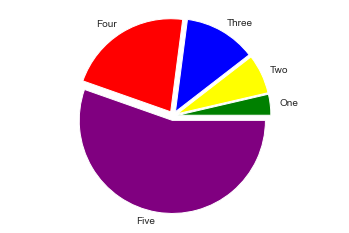

In [67]:
import matplotlib.pyplot as plt
from matplotlib import style

one = (dataset['Rating'] == 1).sum()
two = (dataset['Rating'] == 2).sum()
three = (dataset['Rating'] == 3).sum()
four = (dataset['Rating'] == 4).sum()
five = (dataset['Rating'] == 5).sum()
print(one)
print(two)

p = [one, two, three, four, five]
plt.pie(p, #giving array
    labels = ['One', 'Two', 'Three', 'Four', 'Five'], #Correspndingly giving labels
    colors = ['green', 'yellow', 'blue', 'red', 'purple'], # Corresponding colors
    explode = (0.05, 0.05 , 0.05 ,0.05 , 0.05), #How much the gap should me there between the pies
    startangle = 0) #what start angle should be given
plt.axis('equal')
plt.show()

4101
18540


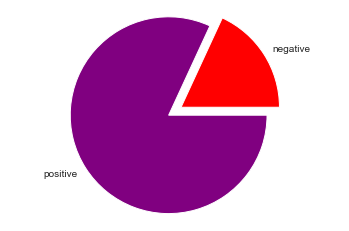

In [68]:
import matplotlib.pyplot as plt
from matplotlib import style

negative = (dataset['Recommended IND'] == 0).sum()
#Summing up all the values of column gender with a
#condition for male and similary for females

positive = (dataset['Recommended IND'] == 1).sum()
print(negative)
print(positive)

p = [negative, positive]
plt.pie(p, #giving array
    labels = ['negative', 'positive'], #Correspndingly giving labels
    colors = ['red', 'purple'], # Corresponding colors
    explode = (0.15, 0), #How much the gap should me there between the pies
    startangle = 0) #what start angle should be given
plt.axis('equal')
plt.show()

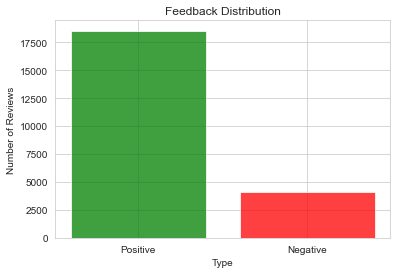

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
#import numpy as np
objects = ('Positive', 'Negative')
y_pos = np.arange(len(objects))
performance = [positive,negative]

plt.bar(y_pos, performance, align='center', alpha=0.75, color=['green', 'red'])
plt.xticks(y_pos, objects)
plt.xlabel('Type')
plt.ylabel('Number of Reviews')
plt.title('Feedback Distribution')

plt.show()

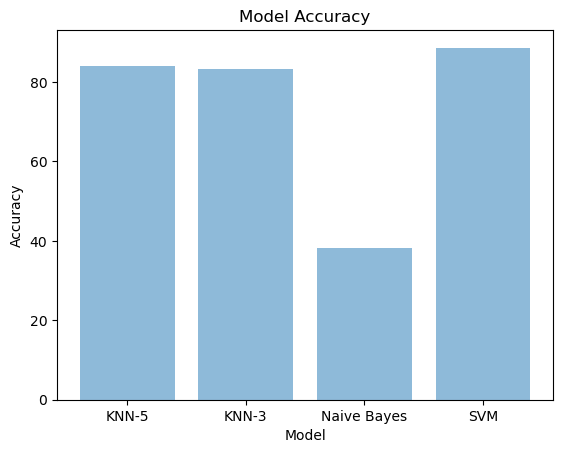

In [79]:
import matplotlib.pyplot as plt; plt.rcdefaults()


objects = ('KNN-5', 'KNN-3', 'Naive Bayes', 'SVM')
y_pos = np.arange(len(objects))
performance =[knn5Acc, knn3Acc, naivebAcc, svmAcc]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.show()

###   20. Compare the model performance and select a best model and briefly discuss why this is the best model

+ The accuracy 0.8396 was obtained for the K Nearest Neighbour Model, where n = 5. 
The precision for predicting if it is a positive comment is very high and is 0.97 and the recall too is of a high value of 0.86. But the precision for predicting if its a negative review low. Recall is 0.69.

+ We get an accuracy of 0.8318 when using the KNN model with n= 3. It too has a high precision and recall when predicting if it is a positive comment or not. We see a low precision  and recall for predicting negative comments though.

+ We get a very low accuracy of  0.3812 when using Gaussian Naive Bayes model.  We get a precision of 0.81 for predicting negative comments but a recall of 0.21. For positive comments we get precision of only 0.28 with a high recall of 0.86.

+ The Support Vector Machine Classification gives a high accuracy of 0.88606 with a precision of 0.81 for predicting negative comments, with low false positive values, and a recall of 0.86 when predicting positive comments. But we have a few false negatives for negative review prediction as recall is 0.21.

+ As Support Vector Machine Classification gives the highest accuracy, and gives good precision and recall values, we conclude that the best model is this.  


### 21. How can you improve the performance of your models?

+ Treat Misssing Values
+ it is important to treat missing values and outlier values well. The presence of these leads to inaccurate predictions

+ Feature Selection

+ Multiple algorithms

+ Cross validations

+ Feature engineering


#### To increase performance of naive bayes model, 

+ reduce the amount of data  that is given to train
+ use the Fisher Method to increase the accuracy

### To increase performance of KNN model
+ do not give a too high k value or a too low k value
+ test different k values and get the one with the best accuracy

### To increase performance of SVM model
+ change the kernel type and select the best kernel type
+ reduce the size of test dataset and increase size of train dataset as svm needs a large dataset to get a high accurate model
